# Describing Datasets: demo

# Part 1: Basic Statistics

The sample input dataset is taken from Conway & Myles Machine Learning for Hackers book, Chapter 2.

Each sample contains three columns.
* Height in inches
* Weight in pounds
* IsMale: 1 corresponds to a male person, and 0 corresponds to a female person.

We want to collect different basic statistics for this dataset.

In [1]:
 data_file = "height_weight_gender.csv"

In [2]:
import pandas as pd

data = pd.read_csv(data_file)
print(data.columns)
print(data.dtypes)

Index(['Height', 'Weight', 'IsMale'], dtype='object')
Height    float64
Weight    float64
IsMale      int64
dtype: object


In [3]:
data.describe()

,Height,Weight,IsMale
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,0.500000
std,3.847528,32.108439,0.500025
min,54.263133,64.700127,0.000000
25%,63.505620,135.818051,0.000000
50%,66.318070,161.212928,0.500000
75%,69.174262,187.169525,1.000000
max,78.998742,269.989698,1.000000


## Subset of a dataset

In [4]:
height = data["Height"]
height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [5]:
# Only women:
women = data[data["IsMale"]== 0]
w_height = women["Height"]
w_height.head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

In [6]:
men = data[data["IsMale"]== 1]
m_height = men["Height"]
m_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

## Mean and Median

To find a mean across a single dimension:

In [7]:
print("MEAN of the height:")
print(height.mean())

MEAN of the height:
66.367559754866


In [8]:
print("Mean of the men height:")
print(m_height.mean())

Mean of the men height:
69.026345906274


In [9]:
print("Mean of the women height:")
print(w_height.mean())

Mean of the women height:
63.708773603458006


To find a median:

In [10]:
print("MEDIAN of the height:")
print(height.median())

MEDIAN of the height:
66.31807008


The mean and the median do not differ significantly in this dataset.

## Difference between Mean and Median

To see the difference let's add several new observations to the dataset: some tallest known men:

272 cm (107.087 in)

270 cm (106.299 in) 

269 cm (105.906 in)

265 cm (104.331 in)

264 cm (103.937 in)

In [11]:
# create a new dataset with an oulier
m_height_out = m_height.copy()

new_row =  107.087
# add the new row at the end
m_height_out.loc[len(m_height_out)] = new_row

new_row =  106.299
# add the new row at the end
m_height_out.loc[len(m_height_out)] = new_row

new_row =  106.906
# add the new row at the end
m_height_out.loc[len(m_height_out)] = new_row

new_row =  104.331
# add the new row at the end
m_height_out.loc[len(m_height_out)] = new_row

new_row =  103.937
# add the new row at the end
m_height_out.loc[len(m_height_out)] = new_row

# check that they were added
m_height_out.tail()

5000    107.087
5001    106.299
5002    106.906
5003    104.331
5004    103.937
Name: Height, dtype: float64

In [13]:
print("MEAN of the height in the original dataset:")
print(m_height.mean())
print("MEAN of the height in dataset with one outlier:")
print(m_height_out.mean())

MEAN of the height in the original dataset:
69.026345906274
MEAN of the height in dataset with one outlier:
69.06299491136265


In [14]:
print("MEDIAN of the height in the original dataset:")
print(m_height.median())
print("MEDIAN of the height in dataset with one outlier:")
print(m_height_out.median())

MEDIAN of the height in the original dataset:
69.02770851
MEDIAN of the height in dataset with one outlier:
69.03077173


## Standard deviation
To find a variance/standard deviation:

In [15]:
# Returns unbiased variance over requested axis.
# Normalized by N-1 by default: ddof = 1
height.var(ddof=1)

14.803472640312714

If that wiould be not a sample but the entire population, we would set ddof=0:

In [16]:
# Population variance: ddof = 0
height.var(ddof=0)

14.801992293048682

In [17]:
# Returns sample standard deviation over requested axis.
# Normalized by N-1 by default: ddof = 1
height.std(ddof=1)

3.847528120795573

## Mode

The mode of a set of values is the value that appears most often: the peek of a frequency distribution.
The distribution might have several modes.

Because the values of height and weight are continuous, the mode is not directly applicable here:

In [18]:
data["Height"].mode()

0       54.263133
1       54.616858
2       54.873728
3       55.148557
4       55.336492
          ...    
9995    78.095867
9996    78.462053
9997    78.528210
9998    78.621374
9999    78.998742
Name: Height, Length: 10000, dtype: float64

That means that each value occurs only once, and every one of them is a mode value.

In [19]:
# we convert the float into int
int_height = data["Height"].astype('int32')
int_height.dtype

dtype('int32')

In [20]:
# check that this did not harm the original dataset
data["Height"].dtype

dtype('float64')

In [21]:
# now compute basic statistics
print("MEAN of the int_height:")
print(int_height.mean())

print("MEDIAN of the int_height:")
print(int_height.median())

print("MODE of the int_height:")
print(int_height.mode())

MEAN of the int_height:
65.8662
MEDIAN of the int_height:
66.0
MODE of the int_height:
0    67
Name: Height, dtype: int32


# Part 2: Visualizing Data

## Bar charts

We use these charts to compare frequencies or counts: for example the count of data points in different categories. They are  often used for displaying nominal(categorical) data: data that has no inherent order or structure, such as hair color or preferred drink.

In our dataset we have two categories: Male and Female. 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

How many total observations in each category? Using frequency counts for each.

Text(0, 0.5, 'Count')

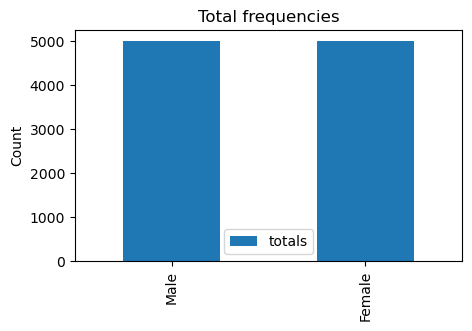

In [23]:
# create data for the plot
plotdata = pd.DataFrame({
    "totals":[m_height.count(), w_height.count()]},
    index=["Male", "Female"])
plotdata.plot(kind='bar', figsize=(5, 3))

plt.title("Total frequencies")
plt.ylabel("Count")

What is the mean height and mean weight of men and women in the dataset?

We will also compute the mean BMI index:  

$BMI = weight (lb) / height (in)^2 \times 703$

Text(0, 0.5, 'Mean values')

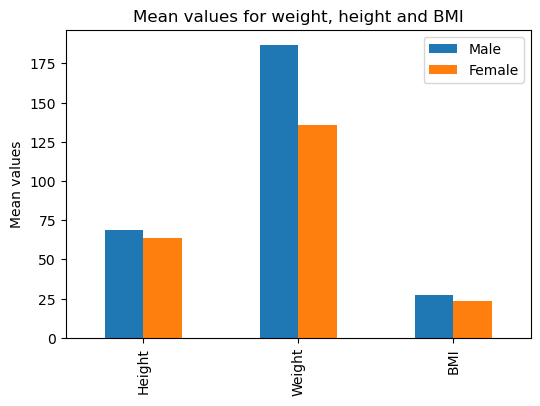

In [24]:
# create data for the plot
male_height_mean = data[data["IsMale"]==1]["Height"].mean()
male_weight_mean = data[data["IsMale"]==1]["Weight"].mean()

fem_height_mean = data[data["IsMale"]==0]["Height"].mean()
fem_weight_mean = data[data["IsMale"]==0]["Weight"].mean()

male_BMI_mean = male_weight_mean/(male_height_mean)**2 * 703
fem_BMI_mean = fem_weight_mean/(fem_height_mean)**2 * 703

plotdata = pd.DataFrame({
    "Male":[male_height_mean, male_weight_mean, male_BMI_mean],
    "Female":[fem_height_mean,fem_weight_mean, fem_BMI_mean]},
index=["Height", "Weight", "BMI"])
plotdata.plot(kind='bar', figsize=(6, 4))

plt.title("Mean values for weight, height and BMI")
plt.ylabel("Mean values")

## Histogram
A histogram divides the values within a numerical variable into “bins”, and counts the frequency of observations that fall into each bin. It is commonly used to obtain a very immediate and intuitive sense of the distribution of values within a variable.

Text(0, 0.5, 'Frequency')

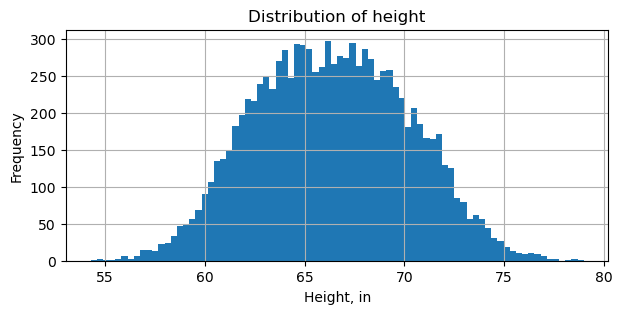

In [25]:
# plot one column of data
data.hist(column="Height", bins=80, figsize=(7, 3))

plt.title("Distribution of height")
plt.xlabel("Height, in")
plt.ylabel("Frequency")

This distribution is **unimodal**.

Text(0, 0.5, 'Frequency')

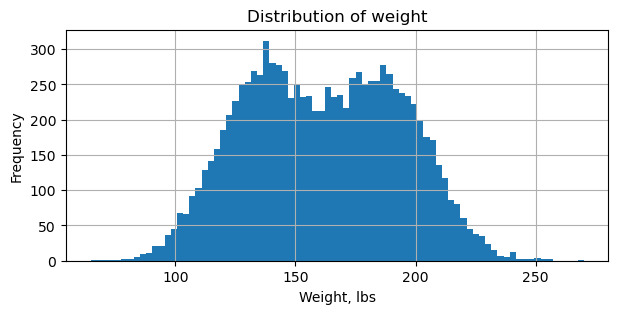

In [26]:
# plot one column of data
data.hist(column="Weight", bins=80, figsize=(7, 3))

plt.title("Distribution of weight")
plt.xlabel("Weight, lbs")
plt.ylabel("Frequency")

This distribution is **bimodal**.

## Percentiles

In [27]:
percentiles = [0.25, 0.5, 0.75]
data['Height'].quantile(percentiles)

0.25    63.505620
0.50    66.318070
0.75    69.174262
Name: Height, dtype: float64

We now use this to identify and remove outliers. We determine the value of a fence around the data:

The interquartile range (IQR) is a measure of the spread of the middle 50% of the data. The IQR can be calculated as the difference between the 75-th percentile and the 25-th percentile of the dataset. Any data point outside the range of 1.5 times the IQR below the 25th percentile or above the 75th percentile can be considered an outlier.

To identify outliers using the IQR, we can use the quantile() function in pandas to calculate the 25th and 75th percentiles of the dataset. We can then calculate the IQR and use it to identify outliers.

In [28]:
# calculate IQR for column Height
Q1 = data['Height'].quantile(0.25)
Q3 = data['Height'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = data[(data['Height'] < Q1 - threshold * IQR) | (data['Height'] > Q3 + threshold * IQR)]
outliers.count()

Height    8
Weight    8
IsMale    8
dtype: int64

Remove outliers from the dataset.

In [29]:
# drop rows containing outliers
data_clean = data.drop(outliers.index)

## Box Plot

<Axes: >

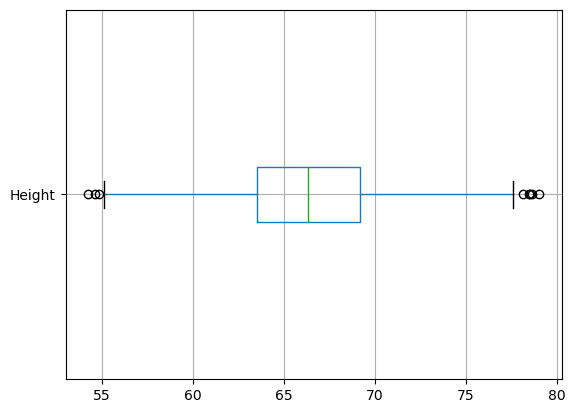

In [38]:
col = 'Height'
data.boxplot(column=col, vert=False)

In [34]:
# let's define a function to remove outliers

# let's define a function to remove outliers
def get_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df[(df[col] < Q1 - threshold * IQR) | (df[col] > Q3 + threshold * IQR)]
    
    return outliers.index

def remove_outliers(df, index):
    return df.drop(index)

<Axes: >

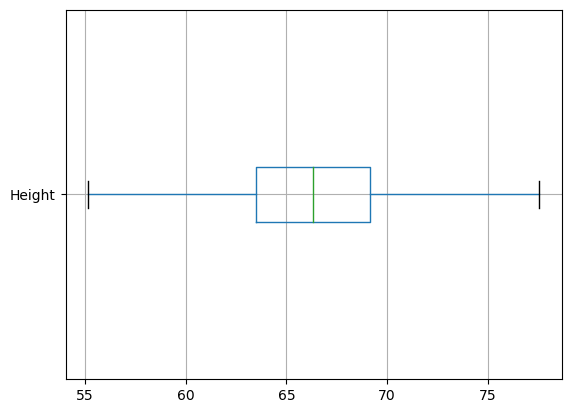

In [35]:
col = 'Height'
outliers = get_outliers(data, col)
df_clean = remove_outliers(data, outliers)
df_clean.boxplot(column=col, vert=False)

In [36]:
# now we can compare height of male and female aftewr removing their outliers
col = 'Height'
fem_outliers = get_outliers(data[data['IsMale']==0], col)
male_outliers =  get_outliers(data[data['IsMale']==1], col)

df_clean = remove_outliers(data, fem_outliers)
df_clean = remove_outliers(df_clean, male_outliers)

<Axes: title={'center': 'Height'}, ylabel='IsMale'>

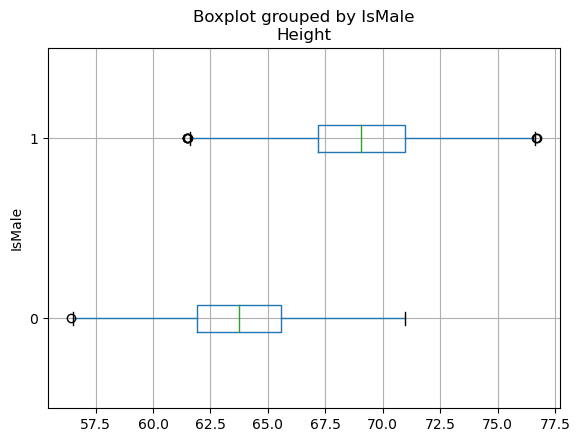

In [37]:
df_clean.boxplot(column=col, by='IsMale', vert=False )

<Axes: title={'center': 'Weight'}, ylabel='IsMale'>

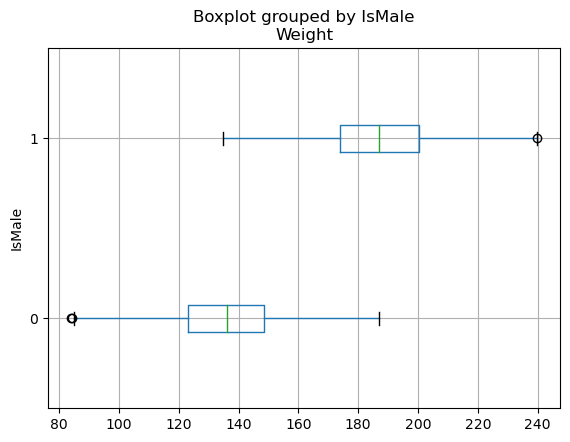

In [39]:
# and now we will do the same for the weight
col = 'Weight'
fem_outliers = get_outliers(data[data['IsMale']==0], col)
male_outliers =  get_outliers(data[data['IsMale']==1], col)

df_clean = remove_outliers(data, fem_outliers)
df_clean = remove_outliers(df_clean, male_outliers)

df_clean.boxplot(column=col, by='IsMale', vert=False)

## Scatter plot

To estimate the relationships between two variables we create a scatter plot in two dimensions.

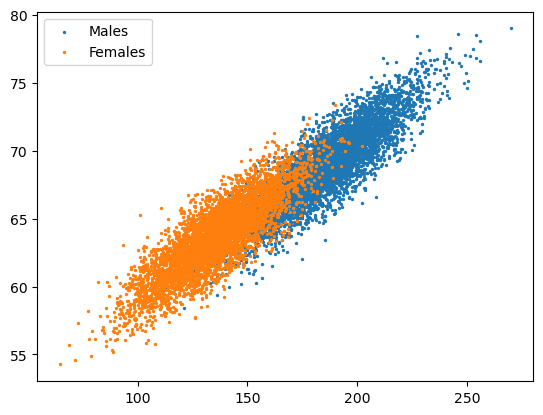

In [42]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target value, class, last column of the data frame
Y = data.iloc[:, -1]

# all males
males = data[data["IsMale"]==1]


# all females
females = data[data["IsMale"]==0]

# plot
plt.scatter(males["Weight"], males["Height"], s=2, label='Males')
plt.scatter(females["Weight"], females["Height"], s=2, label='Females')
plt.legend()
plt.show()

Copyright &copy; 2024 Marina Barsky. All rights reserved.